In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

In [18]:
dataset = 'model/point_history_classifier/point_history.csv'
model_save_path = 'model/point_history_classifier/point_history_classifier.h5'

In [3]:
NUM_CLASSES = 4

In [4]:
TIME_STEPS = 16
DIMENSION =2

In [6]:
X_dataset = np.loadtxt(dataset, delimiter = ',', dtype='float32', usecols=list(range(1, (TIME_STEPS * DIMENSION)+ 1)))
Y_dataset = np.loadtxt(dataset, delimiter = ',', dtype='int32', usecols=(0))


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, Y_dataset, train_size=0.75, random_state=RANDOM_SEED)

In [19]:
use_lstm = False
model = None

if use_lstm:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Reshape((TIME_STEPS, DIMENSION), input_shape=(TIME_STEPS*DIMENSION,)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(16, input_shape = [TIME_STEPS, DIMENSION]),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')

    ])
else:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
        ])

/Users/georgepapadopoulos/miniforge3/envs/hand_env/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [20]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 24)             │           792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            44 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,086 (4.24 KB)

 Trainable params: 1,086 (4.24 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [22]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)

es_callback = tf.keras.callbacks.EarlyStopping(patience= 20, verbose=1)

In [23]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 13s 437ms/step - accuracy: 0.2500 - loss: 1.3889
Epoch 1: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2587 - loss: 1.3818 - val_accuracy: 0.5853 - val_loss: 1.3642
Epoch 2/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5469 - loss: 1.3685
Epoch 2: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5279 - loss: 1.3642 - val_accuracy: 0.6435 - val_loss: 1.3455
Epoch 3/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5625 - loss: 1.3495
Epoch 3: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5454 - loss: 1.3440 - val_accuracy: 0.6601 - val_loss: 1.3201
Epoch 4/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5312 - loss: 1.3336
Epoch 4: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5664 - loss: 1.3187 - val_accuracy: 0.6631 - val_loss: 1.2876
Epoch 5/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5000 - loss: 1.3022
Epoch 5: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5636 - loss: 1.2939 - val_accuracy: 0.6775 - val_loss: 1.2485
Epoch 6/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5703 - loss: 1.2428
Epoch 6: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5852 - loss: 1.2504 - val_accuracy: 0.7017 - val_loss: 1.2025
Epoch 7/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6562 - loss: 1.1991
Epoch 7: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6042 - loss: 1.2100 - val_accuracy: 0.7492 - val_loss: 1.1522
Epoch 8/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6484 - loss: 1.1693
Epoch 8: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6243 - loss: 1.1628 - val_accuracy: 0.7878 - val_loss: 1.0959
Epoch 9/1000
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6227 - loss: 1.1286 
Epoch 9: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6231 - loss: 1.1278 - val_accuracy: 0.8074 - val_loss: 1.0380
Epoch 10/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6719 - loss: 1.0900
Epoch 10: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6590 - loss: 1.0731 - val_accuracy: 0.8512 - val_loss: 0.9758
Epoch 11/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6953 - loss: 1.0111
Epoch 11: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6758 - loss: 1.0226 - val_accuracy: 0.8905 - val_loss: 0.9144
Epoch 12/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6797 - loss: 0.9901
Epoch 12: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6867 - loss: 0.9777 - val_accuracy: 0.8988 - val_loss: 0.8515
Epoch 13/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8281 - loss: 0.8517
Epoch 13: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7219 - loss: 0.9128 - val_accuracy: 0.9094 - val_loss: 0.7909
Epoch 14/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7266 - loss: 0.8957
Epoch 14: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7234 - loss: 0.8800 - val_accuracy: 0.9169 - val_loss: 0.7340
Epoch 15/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7188 - loss: 0.8667
Epoch 15: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7239 - loss: 0.8512 - val_accuracy: 0.9290 - val_loss: 0.6832
Epoch 16/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7812 - loss: 0.7814
Epoch 16: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7399 - loss: 0.8023 - val_accuracy: 0.9350 - val_loss: 0.6354
Epoch 17/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7266 - loss: 0.8099
Epoch 17: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7546 - loss: 0.7670 - val_accuracy: 0.9366 - val_loss: 0.5905
Epoch 18/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7969 - loss: 0.6963
Epoch 18: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7573 - loss: 0.7297 - val_accuracy: 0.9388 - val_loss: 0.5529
Epoch 19/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7031 - loss: 0.7420
Epoch 19: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7389 - loss: 0.7329 - val_accuracy: 0.9418 - val_loss: 0.5216
Epoch 20/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7578 - loss: 0.7288
Epoch 20: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7691 - loss: 0.6954 - val_accuracy: 0.9449 - val_loss: 0.4932
Epoch 21/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7500 - loss: 0.7108
Epoch 21: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7537 - loss: 0.6928 - val_accuracy: 0.9449 - val_loss: 0.4681
Epoch 22/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7812 - loss: 0.6498
Epoch 22: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7769 - loss: 0.6542 - val_accuracy: 0.9449 - val_loss: 0.4459
Epoch 23/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7734 - loss: 0.6073
Epoch 23: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7725 - loss: 0.6414 - val_accuracy: 0.9479 - val_loss: 0.4242
Epoch 24/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8359 - loss: 0.5823
Epoch 24: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7867 - loss: 0.6236 - val_accuracy: 0.9509 - val_loss: 0.4054
Epoch 25/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8359 - loss: 0.5473
Epoch 25: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7952 - loss: 0.6156 - val_accuracy: 0.9509 - val_loss: 0.3904
Epoch 26/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7578 - loss: 0.6544
Epoch 26: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7888 - loss: 0.5985 - val_accuracy: 0.9532 - val_loss: 0.3733
Epoch 27/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7734 - loss: 0.6109
Epoch 27: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7738 - loss: 0.6185 - val_accuracy: 0.9532 - val_loss: 0.3611
Epoch 28/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8438 - loss: 0.5681
Epoch 28: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7961 - loss: 0.5848 - val_accuracy: 0.9547 - val_loss: 0.3527
Epoch 29/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8125 - loss: 0.5650
Epoch 29: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7958 - loss: 0.5772 - val_accuracy: 0.9539 - val_loss: 0.3448
Epoch 30/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7734 - loss: 0.6218
Epoch 30: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7990 - loss: 0.5780 - val_accuracy: 0.9569 - val_loss: 0.3358
Epoch 31/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7969 - loss: 0.5468
Epoch 31: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7917 - loss: 0.5768 - val_accuracy: 0.9562 - val_loss: 0.3279
Epoch 32/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7578 - loss: 0.6416
Epoch 32: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7981 - loss: 0.5527 - val_accuracy: 0.9569 - val_loss: 0.3196
Epoch 33/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7266 - loss: 0.6236
Epoch 33: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7865 - loss: 0.5733 - val_accuracy: 0.9607 - val_loss: 0.3122
Epoch 34/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7734 - loss: 0.5755
Epoch 34: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8042 - loss: 0.5605 - val_accuracy: 0.9600 - val_loss: 0.3072
Epoch 35/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7891 - loss: 0.5363
Epoch 35: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7886 - loss: 0.5809 - val_accuracy: 0.9600 - val_loss: 0.3028
Epoch 36/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8125 - loss: 0.5533
Epoch 36: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8088 - loss: 0.5324 - val_accuracy: 0.9585 - val_loss: 0.2967
Epoch 37/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7500 - loss: 0.6267
Epoch 37: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7938 - loss: 0.5728 - val_accuracy: 0.9600 - val_loss: 0.2941
Epoch 38/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8281 - loss: 0.4729
Epoch 38: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8060 - loss: 0.5329 - val_accuracy: 0.9592 - val_loss: 0.2899
Epoch 39/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8594 - loss: 0.5162
Epoch 39: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8066 - loss: 0.5353 - val_accuracy: 0.9607 - val_loss: 0.2851
Epoch 40/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8125 - loss: 0.5010
Epoch 40: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8057 - loss: 0.5317 - val_accuracy: 0.9615 - val_loss: 0.2816
Epoch 41/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7969 - loss: 0.5519
Epoch 41: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8084 - loss: 0.5327 - val_accuracy: 0.9607 - val_loss: 0.2778
Epoch 42/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8359 - loss: 0.4411
Epoch 42: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8193 - loss: 0.4855 - val_accuracy: 0.9615 - val_loss: 0.2723
Epoch 43/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8047 - loss: 0.5016
Epoch 43: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8155 - loss: 0.5161 - val_accuracy: 0.9607 - val_loss: 0.2689
Epoch 44/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8125 - loss: 0.5599
Epoch 44: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8216 - loss: 0.5054 - val_accuracy: 0.9607 - val_loss: 0.2656
Epoch 45/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7734 - loss: 0.5607
Epoch 45: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8077 - loss: 0.5394 - val_accuracy: 0.9615 - val_loss: 0.2658
Epoch 46/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8125 - loss: 0.4734
Epoch 46: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8284 - loss: 0.4970 - val_accuracy: 0.9615 - val_loss: 0.2600
Epoch 47/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8750 - loss: 0.4484
Epoch 47: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8282 - loss: 0.5061 - val_accuracy: 0.9615 - val_loss: 0.2578
Epoch 48/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8672 - loss: 0.4420
Epoch 48: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8208 - loss: 0.5186 - val_accuracy: 0.9607 - val_loss: 0.2574
Epoch 49/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8047 - loss: 0.5426
Epoch 49: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8052 - loss: 0.5254 - val_accuracy: 0.9615 - val_loss: 0.2556
Epoch 50/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8125 - loss: 0.5150
Epoch 50: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8228 - loss: 0.5151 - val_accuracy: 0.9622 - val_loss: 0.2551
Epoch 51/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8281 - loss: 0.6075
Epoch 51: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8233 - loss: 0.4981 - val_accuracy: 0.9592 - val_loss: 0.2541
Epoch 52/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8438 - loss: 0.4368
Epoch 52: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8246 - loss: 0.4942 - val_accuracy: 0.9607 - val_loss: 0.2517
Epoch 53/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8047 - loss: 0.5912
Epoch 53: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8161 - loss: 0.5284 - val_accuracy: 0.9645 - val_loss: 0.2500
Epoch 54/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8047 - loss: 0.4784
Epoch 54: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8201 - loss: 0.4940 - val_accuracy: 0.9637 - val_loss: 0.2461
Epoch 55/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7734 - loss: 0.6240
Epoch 55: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8188 - loss: 0.5118 - val_accuracy: 0.9622 - val_loss: 0.2457
Epoch 56/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8594 - loss: 0.4209
Epoch 56: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8312 - loss: 0.4874 - val_accuracy: 0.9637 - val_loss: 0.2459
Epoch 57/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7656 - loss: 0.6222
Epoch 57: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8110 - loss: 0.5418 - val_accuracy: 0.9637 - val_loss: 0.2438
Epoch 58/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8281 - loss: 0.4792
Epoch 58: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8218 - loss: 0.5040 - val_accuracy: 0.9615 - val_loss: 0.2436
Epoch 59/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8047 - loss: 0.5924
Epoch 59: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8280 - loss: 0.4810 - val_accuracy: 0.9645 - val_loss: 0.2435
Epoch 60/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8125 - loss: 0.5098
Epoch 60: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8280 - loss: 0.4922 - val_accuracy: 0.9615 - val_loss: 0.2414
Epoch 61/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8516 - loss: 0.4171
Epoch 61: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8248 - loss: 0.5001 - val_accuracy: 0.9637 - val_loss: 0.2403
Epoch 62/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8281 - loss: 0.4894
Epoch 62: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8232 - loss: 0.5180 - val_accuracy: 0.9645 - val_loss: 0.2383
Epoch 63/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8125 - loss: 0.5921
Epoch 63: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8243 - loss: 0.5041 - val_accuracy: 0.9645 - val_loss: 0.2380
Epoch 64/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8516 - loss: 0.5132
Epoch 64: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8351 - loss: 0.4887 - val_accuracy: 0.9600 - val_loss: 0.2434
Epoch 65/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8516 - loss: 0.4845
Epoch 65: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8339 - loss: 0.4717 - val_accuracy: 0.9622 - val_loss: 0.2405
Epoch 66/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8438 - loss: 0.4633
Epoch 66: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8296 - loss: 0.4903 - val_accuracy: 0.9607 - val_loss: 0.2379
Epoch 67/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7812 - loss: 0.5336
Epoch 67: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8304 - loss: 0.4664 - val_accuracy: 0.9615 - val_loss: 0.2359
Epoch 68/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8047 - loss: 0.4913
Epoch 68: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8159 - loss: 0.4797 - val_accuracy: 0.9615 - val_loss: 0.2340
Epoch 69/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8281 - loss: 0.4885
Epoch 69: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8352 - loss: 0.4728 - val_accuracy: 0.9653 - val_loss: 0.2325
Epoch 70/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7578 - loss: 0.6140
Epoch 70: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8328 - loss: 0.4692 - val_accuracy: 0.9630 - val_loss: 0.2305
Epoch 71/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8438 - loss: 0.4553
Epoch 71: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8425 - loss: 0.4586 - val_accuracy: 0.9630 - val_loss: 0.2290
Epoch 72/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8281 - loss: 0.3864
Epoch 72: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8360 - loss: 0.4523 - val_accuracy: 0.9615 - val_loss: 0.2275
Epoch 73/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8125 - loss: 0.4216
Epoch 73: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8256 - loss: 0.4604 - val_accuracy: 0.9607 - val_loss: 0.2266
Epoch 74/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8281 - loss: 0.4481
Epoch 74: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8311 - loss: 0.4621 - val_accuracy: 0.9645 - val_loss: 0.2243
Epoch 75/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8516 - loss: 0.3938
Epoch 75: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8373 - loss: 0.4635 - val_accuracy: 0.9653 - val_loss: 0.2234
Epoch 76/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8203 - loss: 0.4584
Epoch 76: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8397 - loss: 0.4663 - val_accuracy: 0.9645 - val_loss: 0.2253
Epoch 77/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8359 - loss: 0.4209
Epoch 77: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8337 - loss: 0.4674 - val_accuracy: 0.9630 - val_loss: 0.2249
Epoch 78/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8516 - loss: 0.4074
Epoch 78: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8353 - loss: 0.4683 - val_accuracy: 0.9637 - val_loss: 0.2271
Epoch 79/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9062 - loss: 0.3732
Epoch 79: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8453 - loss: 0.4508 - val_accuracy: 0.9660 - val_loss: 0.2274
Epoch 80/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8359 - loss: 0.5085
Epoch 80: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8369 - loss: 0.4604 - val_accuracy: 0.9630 - val_loss: 0.2234
Epoch 81/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8672 - loss: 0.3902
Epoch 81: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8400 - loss: 0.4381 - val_accuracy: 0.9645 - val_loss: 0.2213
Epoch 82/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8516 - loss: 0.4820
Epoch 82: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8376 - loss: 0.4664 - val_accuracy: 0.9630 - val_loss: 0.2194
Epoch 83/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8047 - loss: 0.4513
Epoch 83: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8349 - loss: 0.4637 - val_accuracy: 0.9653 - val_loss: 0.2199
Epoch 84/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8438 - loss: 0.4507
Epoch 84: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8248 - loss: 0.4660 - val_accuracy: 0.9637 - val_loss: 0.2213
Epoch 85/1000
27/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8288 - loss: 0.4635 
Epoch 85: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8309 - loss: 0.4606 - val_accuracy: 0.9615 - val_loss: 0.2224
Epoch 86/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8594 - loss: 0.4089
Epoch 86: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8324 - loss: 0.4794 - val_accuracy: 0.9630 - val_loss: 0.2223
Epoch 87/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7891 - loss: 0.5700
Epoch 87: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8214 - loss: 0.5009 - val_accuracy: 0.9630 - val_loss: 0.2235
Epoch 88/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8047 - loss: 0.5115
Epoch 88: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8381 - loss: 0.4585 - val_accuracy: 0.9622 - val_loss: 0.2268
Epoch 89/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8750 - loss: 0.4119
Epoch 89: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8437 - loss: 0.4450 - val_accuracy: 0.9645 - val_loss: 0.2246
Epoch 90/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8359 - loss: 0.4006
Epoch 90: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8452 - loss: 0.4460 - val_accuracy: 0.9637 - val_loss: 0.2228
Epoch 91/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8672 - loss: 0.3896
Epoch 91: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8375 - loss: 0.4483 - val_accuracy: 0.9637 - val_loss: 0.2222
Epoch 92/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7812 - loss: 0.5285
Epoch 92: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8302 - loss: 0.4434 - val_accuracy: 0.9630 - val_loss: 0.2205
Epoch 93/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8516 - loss: 0.5221
Epoch 93: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8415 - loss: 0.4478 - val_accuracy: 0.9630 - val_loss: 0.2172
Epoch 94/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8438 - loss: 0.5957
Epoch 94: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8341 - loss: 0.4721 - val_accuracy: 0.9645 - val_loss: 0.2164
Epoch 95/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8906 - loss: 0.3153
Epoch 95: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8459 - loss: 0.4337 - val_accuracy: 0.9637 - val_loss: 0.2171
Epoch 96/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7891 - loss: 0.6012
Epoch 96: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8399 - loss: 0.4586 - val_accuracy: 0.9622 - val_loss: 0.2150
Epoch 97/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8047 - loss: 0.4924
Epoch 97: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8511 - loss: 0.4399 - val_accuracy: 0.9600 - val_loss: 0.2145
Epoch 98/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8281 - loss: 0.4262
Epoch 98: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8417 - loss: 0.4429 - val_accuracy: 0.9600 - val_loss: 0.2137
Epoch 99/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8125 - loss: 0.5535
Epoch 99: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8412 - loss: 0.4436 - val_accuracy: 0.9622 - val_loss: 0.2127
Epoch 100/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8359 - loss: 0.4417
Epoch 100: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8331 - loss: 0.4674 - val_accuracy: 0.9630 - val_loss: 0.2114
Epoch 101/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8047 - loss: 0.5254
Epoch 101: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8411 - loss: 0.4431 - val_accuracy: 0.9622 - val_loss: 0.2109
Epoch 102/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8906 - loss: 0.4179
Epoch 102: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8439 - loss: 0.4525 - val_accuracy: 0.9622 - val_loss: 0.2121
Epoch 103/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8750 - loss: 0.3271
Epoch 103: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8382 - loss: 0.4414 - val_accuracy: 0.9592 - val_loss: 0.2143
Epoch 104/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8516 - loss: 0.3714
Epoch 104: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8505 - loss: 0.4226 - val_accuracy: 0.9630 - val_loss: 0.2120
Epoch 105/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8516 - loss: 0.4032
Epoch 105: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8492 - loss: 0.4344 - val_accuracy: 0.9630 - val_loss: 0.2131
Epoch 106/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8906 - loss: 0.3579
Epoch 106: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8475 - loss: 0.4288 - val_accuracy: 0.9630 - val_loss: 0.2127
Epoch 107/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8594 - loss: 0.4016
Epoch 107: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8475 - loss: 0.4398 - val_accuracy: 0.9630 - val_loss: 0.2126
Epoch 108/1000
30/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8440 - loss: 0.4501 
Epoch 108: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8442 - loss: 0.4491 - val_accuracy: 0.9630 - val_loss: 0.2120
Epoch 109/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8203 - loss: 0.5060
Epoch 109: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8449 - loss: 0.4450 - val_accuracy: 0.9645 - val_loss: 0.2113
Epoch 110/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8594 - loss: 0.3928
Epoch 110: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8470 - loss: 0.4338 - val_accuracy: 0.9622 - val_loss: 0.2098
Epoch 111/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8672 - loss: 0.3999
Epoch 111: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8498 - loss: 0.4257 - val_accuracy: 0.9615 - val_loss: 0.2082
Epoch 112/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8516 - loss: 0.4057
Epoch 112: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8437 - loss: 0.4535 - val_accuracy: 0.9607 - val_loss: 0.2096
Epoch 113/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8125 - loss: 0.4875
Epoch 113: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8460 - loss: 0.4394 - val_accuracy: 0.9622 - val_loss: 0.2079
Epoch 114/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9062 - loss: 0.2950
Epoch 114: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8528 - loss: 0.4283 - val_accuracy: 0.9615 - val_loss: 0.2053
Epoch 115/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8516 - loss: 0.3998
Epoch 115: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8471 - loss: 0.4233 - val_accuracy: 0.9622 - val_loss: 0.2053
Epoch 116/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8906 - loss: 0.3872
Epoch 116: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8407 - loss: 0.4385 - val_accuracy: 0.9630 - val_loss: 0.2050
Epoch 117/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8125 - loss: 0.4737
Epoch 117: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8348 - loss: 0.4691 - val_accuracy: 0.9630 - val_loss: 0.2066
Epoch 118/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8047 - loss: 0.5387
Epoch 118: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8421 - loss: 0.4397 - val_accuracy: 0.9615 - val_loss: 0.2054
Epoch 119/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7812 - loss: 0.5149
Epoch 119: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8304 - loss: 0.4552 - val_accuracy: 0.9622 - val_loss: 0.2051
Epoch 120/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8516 - loss: 0.3691
Epoch 120: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8573 - loss: 0.4289 - val_accuracy: 0.9630 - val_loss: 0.2050
Epoch 121/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8359 - loss: 0.4304
Epoch 121: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8511 - loss: 0.4370 - val_accuracy: 0.9637 - val_loss: 0.2030
Epoch 122/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8125 - loss: 0.4213
Epoch 122: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8449 - loss: 0.4342 - val_accuracy: 0.9630 - val_loss: 0.2043
Epoch 123/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8516 - loss: 0.3885
Epoch 123: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8469 - loss: 0.4311 - val_accuracy: 0.9637 - val_loss: 0.2044
Epoch 124/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8828 - loss: 0.3338
Epoch 124: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8558 - loss: 0.4371 - val_accuracy: 0.9622 - val_loss: 0.2035
Epoch 125/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8359 - loss: 0.4303
Epoch 125: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8447 - loss: 0.4299 - val_accuracy: 0.9622 - val_loss: 0.2030
Epoch 126/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8594 - loss: 0.4046
Epoch 126: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8559 - loss: 0.4168 - val_accuracy: 0.9630 - val_loss: 0.2004
Epoch 127/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7969 - loss: 0.4994
Epoch 127: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8431 - loss: 0.4405 - val_accuracy: 0.9622 - val_loss: 0.2005
Epoch 128/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8125 - loss: 0.4551
Epoch 128: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8482 - loss: 0.4255 - val_accuracy: 0.9622 - val_loss: 0.2014
Epoch 129/1000
30/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8424 - loss: 0.4918 
Epoch 129: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8425 - loss: 0.4892 - val_accuracy: 0.9630 - val_loss: 0.2024
Epoch 130/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8203 - loss: 0.4826
Epoch 130: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8359 - loss: 0.4411 - val_accuracy: 0.9615 - val_loss: 0.2014
Epoch 131/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8672 - loss: 0.3536
Epoch 131: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8466 - loss: 0.4155 - val_accuracy: 0.9622 - val_loss: 0.1997
Epoch 132/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8828 - loss: 0.5327
Epoch 132: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8625 - loss: 0.4354 - val_accuracy: 0.9645 - val_loss: 0.1987
Epoch 133/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8516 - loss: 0.4302
Epoch 133: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8519 - loss: 0.4126 - val_accuracy: 0.9637 - val_loss: 0.1979
Epoch 134/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8281 - loss: 0.4529
Epoch 134: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8413 - loss: 0.4458 - val_accuracy: 0.9653 - val_loss: 0.1985
Epoch 135/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7969 - loss: 0.5246
Epoch 135: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8442 - loss: 0.4346 - val_accuracy: 0.9630 - val_loss: 0.2006
Epoch 136/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8047 - loss: 0.4101
Epoch 136: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8356 - loss: 0.4432 - val_accuracy: 0.9630 - val_loss: 0.2002
Epoch 137/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8281 - loss: 0.4121
Epoch 137: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8517 - loss: 0.4142 - val_accuracy: 0.9645 - val_loss: 0.2010
Epoch 138/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8125 - loss: 0.5131
Epoch 138: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8432 - loss: 0.4439 - val_accuracy: 0.9615 - val_loss: 0.2048
Epoch 139/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8281 - loss: 0.4136
Epoch 139: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8444 - loss: 0.4300 - val_accuracy: 0.9607 - val_loss: 0.2034
Epoch 140/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8203 - loss: 0.5130
Epoch 140: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8464 - loss: 0.4318 - val_accuracy: 0.9637 - val_loss: 0.2029
Epoch 141/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8281 - loss: 0.4323
Epoch 141: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8387 - loss: 0.4328 - val_accuracy: 0.9607 - val_loss: 0.1999
Epoch 142/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8672 - loss: 0.3606
Epoch 142: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8395 - loss: 0.4326 - val_accuracy: 0.9622 - val_loss: 0.1989
Epoch 143/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8672 - loss: 0.3775
Epoch 143: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8512 - loss: 0.4016 - val_accuracy: 0.9630 - val_loss: 0.1990
Epoch 144/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8203 - loss: 0.4798
Epoch 144: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8626 - loss: 0.3917 - val_accuracy: 0.9637 - val_loss: 0.1975
Epoch 145/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8516 - loss: 0.3973
Epoch 145: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8550 - loss: 0.4227 - val_accuracy: 0.9630 - val_loss: 0.1998
Epoch 146/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8438 - loss: 0.4421
Epoch 146: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8522 - loss: 0.4193 - val_accuracy: 0.9645 - val_loss: 0.1965
Epoch 147/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8594 - loss: 0.3523
Epoch 147: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8483 - loss: 0.4162 - val_accuracy: 0.9645 - val_loss: 0.1952
Epoch 148/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8359 - loss: 0.5785
Epoch 148: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8594 - loss: 0.4291 - val_accuracy: 0.9645 - val_loss: 0.1953
Epoch 149/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8906 - loss: 0.3034
Epoch 149: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8569 - loss: 0.3997 - val_accuracy: 0.9660 - val_loss: 0.1947
Epoch 150/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8438 - loss: 0.3948
Epoch 150: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8522 - loss: 0.4224 - val_accuracy: 0.9668 - val_loss: 0.1943
Epoch 151/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8750 - loss: 0.3569
Epoch 151: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8507 - loss: 0.4133 - val_accuracy: 0.9630 - val_loss: 0.1944
Epoch 152/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8672 - loss: 0.4372
Epoch 152: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8521 - loss: 0.4334 - val_accuracy: 0.9660 - val_loss: 0.1931
Epoch 153/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8516 - loss: 0.3776
Epoch 153: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8444 - loss: 0.4223 - val_accuracy: 0.9660 - val_loss: 0.1946
Epoch 154/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8594 - loss: 0.4044
Epoch 154: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8488 - loss: 0.4331 - val_accuracy: 0.9637 - val_loss: 0.1957
Epoch 155/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8281 - loss: 0.4818
Epoch 155: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8353 - loss: 0.4466 - val_accuracy: 0.9645 - val_loss: 0.1959
Epoch 156/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8750 - loss: 0.3598
Epoch 156: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8537 - loss: 0.4176 - val_accuracy: 0.9637 - val_loss: 0.1938
Epoch 157/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8203 - loss: 0.4917
Epoch 157: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8519 - loss: 0.4005 - val_accuracy: 0.9668 - val_loss: 0.1926
Epoch 158/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8672 - loss: 0.4813
Epoch 158: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8603 - loss: 0.4200 - val_accuracy: 0.9637 - val_loss: 0.1918
Epoch 159/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8125 - loss: 0.3991
Epoch 159: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8426 - loss: 0.4247 - val_accuracy: 0.9630 - val_loss: 0.1917
Epoch 160/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8281 - loss: 0.5238
Epoch 160: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8526 - loss: 0.4266 - val_accuracy: 0.9653 - val_loss: 0.1901
Epoch 161/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8906 - loss: 0.4328
Epoch 161: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8645 - loss: 0.4168 - val_accuracy: 0.9630 - val_loss: 0.1914
Epoch 162/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8047 - loss: 0.4986
Epoch 162: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8528 - loss: 0.4146 - val_accuracy: 0.9637 - val_loss: 0.1924
Epoch 163/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8594 - loss: 0.3774
Epoch 163: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8633 - loss: 0.4011 - val_accuracy: 0.9637 - val_loss: 0.1907
Epoch 164/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8281 - loss: 0.5587
Epoch 164: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8385 - loss: 0.4497 - val_accuracy: 0.9622 - val_loss: 0.1916
Epoch 165/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9141 - loss: 0.3115
Epoch 165: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8681 - loss: 0.3872 - val_accuracy: 0.9615 - val_loss: 0.1922
Epoch 166/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8750 - loss: 0.4088
Epoch 166: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8522 - loss: 0.4065 - val_accuracy: 0.9653 - val_loss: 0.1890
Epoch 167/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8750 - loss: 0.4560
Epoch 167: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8491 - loss: 0.4235 - val_accuracy: 0.9653 - val_loss: 0.1897
Epoch 168/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8750 - loss: 0.3969
Epoch 168: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8470 - loss: 0.4341 - val_accuracy: 0.9668 - val_loss: 0.1900
Epoch 169/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8203 - loss: 0.4488
Epoch 169: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8662 - loss: 0.3936 - val_accuracy: 0.9645 - val_loss: 0.1877
Epoch 170/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8750 - loss: 0.3147
Epoch 170: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8589 - loss: 0.3978 - val_accuracy: 0.9645 - val_loss: 0.1883
Epoch 171/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8750 - loss: 0.3455
Epoch 171: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8599 - loss: 0.3939 - val_accuracy: 0.9660 - val_loss: 0.1882
Epoch 172/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8594 - loss: 0.3674
Epoch 172: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8746 - loss: 0.3683 - val_accuracy: 0.9653 - val_loss: 0.1871
Epoch 173/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8906 - loss: 0.3462
Epoch 173: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8631 - loss: 0.3893 - val_accuracy: 0.9630 - val_loss: 0.1874
Epoch 174/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8828 - loss: 0.4156
Epoch 174: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8650 - loss: 0.4139 - val_accuracy: 0.9645 - val_loss: 0.1883
Epoch 175/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8594 - loss: 0.3501
Epoch 175: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8590 - loss: 0.4013 - val_accuracy: 0.9660 - val_loss: 0.1908
Epoch 176/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8672 - loss: 0.3482
Epoch 176: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8570 - loss: 0.3988 - val_accuracy: 0.9660 - val_loss: 0.1855
Epoch 177/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8281 - loss: 0.5365
Epoch 177: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8502 - loss: 0.4198 - val_accuracy: 0.9645 - val_loss: 0.1851
Epoch 178/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8984 - loss: 0.3085
Epoch 178: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8626 - loss: 0.4049 - val_accuracy: 0.9645 - val_loss: 0.1850
Epoch 179/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8438 - loss: 0.4662
Epoch 179: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8549 - loss: 0.4093 - val_accuracy: 0.9637 - val_loss: 0.1862
Epoch 180/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8281 - loss: 0.4362
Epoch 180: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8562 - loss: 0.4106 - val_accuracy: 0.9615 - val_loss: 0.1850
Epoch 181/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8615 - loss: 0.4135 
Epoch 181: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8616 - loss: 0.4130 - val_accuracy: 0.9653 - val_loss: 0.1824
Epoch 182/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8828 - loss: 0.3774
Epoch 182: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8586 - loss: 0.3978 - val_accuracy: 0.9653 - val_loss: 0.1795
Epoch 183/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8594 - loss: 0.4146
Epoch 183: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8509 - loss: 0.4043 - val_accuracy: 0.9660 - val_loss: 0.1809
Epoch 184/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8594 - loss: 0.3878
Epoch 184: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8523 - loss: 0.4179 - val_accuracy: 0.9645 - val_loss: 0.1823
Epoch 185/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8359 - loss: 0.4783
Epoch 185: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8485 - loss: 0.4196 - val_accuracy: 0.9653 - val_loss: 0.1836
Epoch 186/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8438 - loss: 0.4038
Epoch 186: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8514 - loss: 0.4047 - val_accuracy: 0.9645 - val_loss: 0.1831
Epoch 187/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8281 - loss: 0.5246
Epoch 187: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8539 - loss: 0.4140 - val_accuracy: 0.9660 - val_loss: 0.1828
Epoch 188/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8984 - loss: 0.3302
Epoch 188: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8631 - loss: 0.3912 - val_accuracy: 0.9653 - val_loss: 0.1844
Epoch 189/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8672 - loss: 0.4019
Epoch 189: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8477 - loss: 0.4230 - val_accuracy: 0.9645 - val_loss: 0.1852
Epoch 190/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8750 - loss: 0.4703
Epoch 190: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8646 - loss: 0.4132 - val_accuracy: 0.9660 - val_loss: 0.1871
Epoch 191/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8438 - loss: 0.3818
Epoch 191: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8603 - loss: 0.3972 - val_accuracy: 0.9630 - val_loss: 0.1840
Epoch 192/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7812 - loss: 0.4991
Epoch 192: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8572 - loss: 0.3925 - val_accuracy: 0.9630 - val_loss: 0.1828
Epoch 193/1000
30/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8668 - loss: 0.3985 
Epoch 193: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8664 - loss: 0.3996 - val_accuracy: 0.9637 - val_loss: 0.1833
Epoch 194/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8672 - loss: 0.5191
Epoch 194: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8652 - loss: 0.4087 - val_accuracy: 0.9645 - val_loss: 0.1835
Epoch 195/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8281 - loss: 0.4524
Epoch 195: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8459 - loss: 0.4381 - val_accuracy: 0.9622 - val_loss: 0.1851
Epoch 196/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8281 - loss: 0.4056
Epoch 196: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8576 - loss: 0.3876 - val_accuracy: 0.9630 - val_loss: 0.1848
Epoch 197/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9062 - loss: 0.3191
Epoch 197: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8567 - loss: 0.3963 - val_accuracy: 0.9645 - val_loss: 0.1846
Epoch 198/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8750 - loss: 0.4440
Epoch 198: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8610 - loss: 0.4156 - val_accuracy: 0.9637 - val_loss: 0.1826
Epoch 199/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8594 - loss: 0.3204
Epoch 199: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8685 - loss: 0.3850 - val_accuracy: 0.9637 - val_loss: 0.1815
Epoch 200/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8516 - loss: 0.3952
Epoch 200: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8627 - loss: 0.3945 - val_accuracy: 0.9630 - val_loss: 0.1833
Epoch 201/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8828 - loss: 0.3498
Epoch 201: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8628 - loss: 0.3975 - val_accuracy: 0.9645 - val_loss: 0.1844
Epoch 202/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8906 - loss: 0.3880
Epoch 202: saving model to model/point_history_classifier/point_history_classifier.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8657 - loss: 0.3847 - val_accuracy: 0.9630 - val_loss: 0.1823
Epoch 202: early stopping


In [24]:
model = tf.keras.models.load_model(model_save_path)

In [25]:
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[0.93565047 0.01905771 0.02607159 0.01922014]
0


42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step


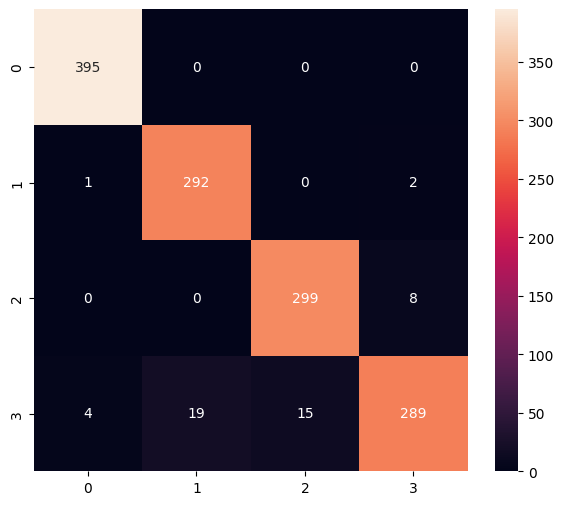

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       395
           1       0.94      0.99      0.96       295
           2       0.95      0.97      0.96       307
           3       0.97      0.88      0.92       327

    accuracy                           0.96      1324
   macro avg       0.96      0.96      0.96      1324
weighted avg       0.96      0.96      0.96      1324



In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels=sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true,y_pred, labels=labels)

    df_cmx = pd.DataFrame(cmx_data, index=labels, columns = labels)

    fig, ax = plt.subplots(figsize=(7,6))
    sns.heatmap(df_cmx, annot=True, fmt='g', square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()

    if report:
        print('Classification Report')
        print(classification_report(y_test,y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

Tensorflow-Lite

In [27]:
model.save(model_save_path, include_optimizer=False)
model = tf.keras.models.load_model(model_save_path)

In [28]:
tflite_save_path = 'model/point_history_classifier/point_history_classifier.tflite'

In [29]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/8y/p3929vr976j0cs_1v60frlqw0000gn/T/tmp2pq2ixt8/assets


INFO:tensorflow:Assets written to: /var/folders/8y/p3929vr976j0cs_1v60frlqw0000gn/T/tmp2pq2ixt8/assets


Saved artifact at '/var/folders/8y/p3929vr976j0cs_1v60frlqw0000gn/T/tmp2pq2ixt8'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  6073913360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6073916240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6073914320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6073917200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6073915472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6073917968: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1747513220.402902  417365 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1747513220.403164  417365 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
I0000 00:00:1747513220.408177  417365 mlir_graph_optimization_pass.cc:425] MLIR V1 optimization pass is not enabled


6444

In [30]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

/Users/georgepapadopoulos/miniforge3/envs/hand_env/lib/python3.12/site-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [31]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)

[{'name': 'serving_default_input_layer_1:0', 'index': 0, 'shape': array([ 1, 32], dtype=int32), 'shape_signature': array([-1, 32], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [32]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))


In [34]:
%%time
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])


CPU times: user 36 μs, sys: 10 μs, total: 46 μs
Wall time: 44.1 μs


In [35]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.93565047 0.01905771 0.02607159 0.01922014]
0
